In [ ]:
# !pip install ggplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    # if sum_stats:
    #     #Accuracy is sum of diagonal divided by total observations
    #     accuracy  = np.trace(cf) / float(np.sum(cf))

    #     #if it is a binary confusion matrix, show some more stats
    #     if len(cf)==2:
    #         #Metrics for Binary Confusion Matrices
    #         precision = cf[1,1] / sum(cf[:,1])
    #         recall    = cf[1,1] / sum(cf[1,:])
    #         f1_score  = 2*precision*recall / (precision + recall)
    #         stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
    #             accuracy,precision,recall,f1_score)
    #     else:
    #         stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    # else:
    #     stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        # plt.xlabel('Predicted label' + stats_text)
    # else:
        # plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
df = pd.DataFrame(data=pd.read_csv('/content/data for train_test.csv'))
df

FileNotFoundError: ignored

In [ ]:
xcol = ['S1', 'S2','S3','S4','S5','S7','S8','S9']
ycol = 'label'
X = df[xcol]
y = df[ycol]

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy="constant")
X = imp.fit_transform(X)
X

array([[5.98600000e+01, 1.83000000e+01, 2.07399998e+01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.87299995e+01, 0.00000000e+00],
       [3.91900000e+01, 3.18800000e+01, 2.20000000e+01, 2.71300000e+02,
        2.55400009e+01, 4.00700000e+02, 2.20000000e+01, 3.99900000e+02],
       [5.98600000e+01, 5.27200000e+01, 2.20200005e+01, 2.42200000e+02,
        3.50000000e+01, 2.49000000e+02, 1.90900002e+01, 3.99800000e+02],
       [3.69600000e+01, 7.71700000e+01, 1.82600002e+01, 7.39000000e+01,
        2.20000000e+01, 9.19000000e+01, 1.91399994e+01, 1.14900000e+02],
       [6.14500000e+01, 7.17400000e+01, 1.83299999e+01, 9.60000000e+00,
        1.87299995e+01, 1.29000000e+01, 1.91100006e+01, 1.09000000e+01],
       [4.04600000e+01, 2.91700000e+01, 1.83600006e+01, 1.00000000e-01,
        1.88299999e+01, 4.00000000e-01, 1.90799999e+01, 0.00000000e+00],
       [4.07800000e+01, 7.53600000e+01, 2.01499996e+01, 2.00000000e-01,
        1.88700008e+01, 2.00000000e-01, 1.90499992e+01, 0.

In [ ]:
X[:,2] = X[:,2]*0.00001 + X[:,0]
X[:,4] = X[:,4]*0.00001 + X[:,0]
X[:,6] = X[:,6]*0.00001 + X[:,0]
X[:,3] = X[:,3]*0.00001 + X[:,1]
X[:,5] = X[:,5]*0.00001 + X[:,1]
X[:,7] = X[:,7]*0.00001 + X[:,1]
X

array([[59.86     , 18.3      , 59.8602074, 18.3      , 59.86     ,
        18.3      , 59.8601873, 18.3      ],
       [39.19     , 31.88     , 39.19022  , 31.882713 , 39.1902554,
        31.884007 , 39.19022  , 31.883999 ],
       [59.86     , 52.72     , 59.8602202, 52.722422 , 59.86035  ,
        52.72249  , 59.8601909, 52.723998 ],
       [36.96     , 77.17     , 36.9601826, 77.170739 , 36.96022  ,
        77.170919 , 36.9601914, 77.171149 ],
       [61.45     , 71.74     , 61.4501833, 71.740096 , 61.4501873,
        71.740129 , 61.4501911, 71.740109 ],
       [40.46     , 29.17     , 40.4601836, 29.170001 , 40.4601883,
        29.170004 , 40.4601908, 29.17     ],
       [40.78     , 75.36     , 40.7802015, 75.360002 , 40.7801887,
        75.360002 , 40.7801905, 75.36     ],
       [23.92     , 11.05     , 23.9201856, 11.054002 , 23.9201892,
        11.050001 , 23.9201901, 11.05     ],
       [60.81     , 59.06     , 60.8101853, 59.063579 , 60.8101896,
        59.060003 , 60.81056

In [ ]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
clsF = LogisticRegression(random_state=42).fit(X[:,3:7], y)
# clsF = LogisticRegression(random_state=0)
# clsF.fit(X_train,y_train)
y_pr = clsF.predict(X[:,1:5])

Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           0       0.80      0.80      0.80         5

    accuracy                           0.92        24
   macro avg       0.87      0.87      0.87        24
weighted avg       0.92      0.92      0.92        24



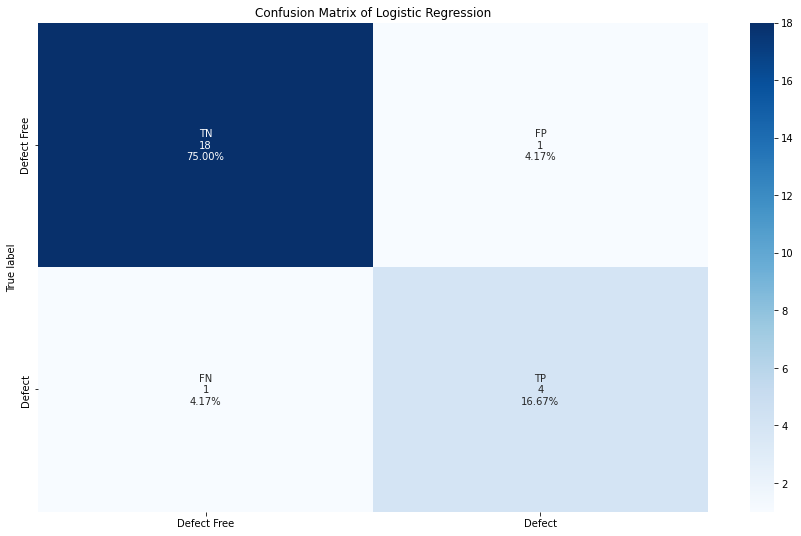

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report

matrix = confusion_matrix(y,y_pr, labels=[1,0])
# print('Confusion matrix : \n',matrix)
# tp, fn, fp, tn = confusion_matrix(y,y_pr,labels=[1,0]).reshape(-1)
# print('Outcome values : \n', tp, fn, fp, tn)

print('Classification report : \n',classification_report(y,y_pr,labels=[1,0]))

group_names = ['TN','FP','FN','TP']
categories = ['Defect Free','Defect']

make_confusion_matrix(matrix, 
                      group_names=group_names,
                      categories=categories, 
                      cmap='Blues',
                      figsize=(15,9))
plt.title('Confusion Matrix of Logistic Regression')
plt.savefig('LR_CM.pdf')
plt.show()

In [ ]:
from sklearn.svm import SVC
clfOCSVM = SVC(gamma='scale',probability=True)
clfOCSVM.fit(X[:,3:7], y)
ysvm_pr = clfOCSVM.predict(X[:,1:5])
print("T")

T


In [ ]:
matrixSVM = confusion_matrix(y,ysvm_pr, labels=[1,0])
print('Confusion matrix : \n',matrixSVM)

tp, fn, fp, tn = confusion_matrix(y,ysvm_pr,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


print('Classification report : \n',classification_report(y,ysvm_pr,labels=[1,0]))

Confusion matrix : 
 [[18  1]
 [ 0  5]]
Outcome values : 
 18 1 0 5
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           0       0.83      1.00      0.91         5

    accuracy                           0.96        24
   macro avg       0.92      0.97      0.94        24
weighted avg       0.97      0.96      0.96        24



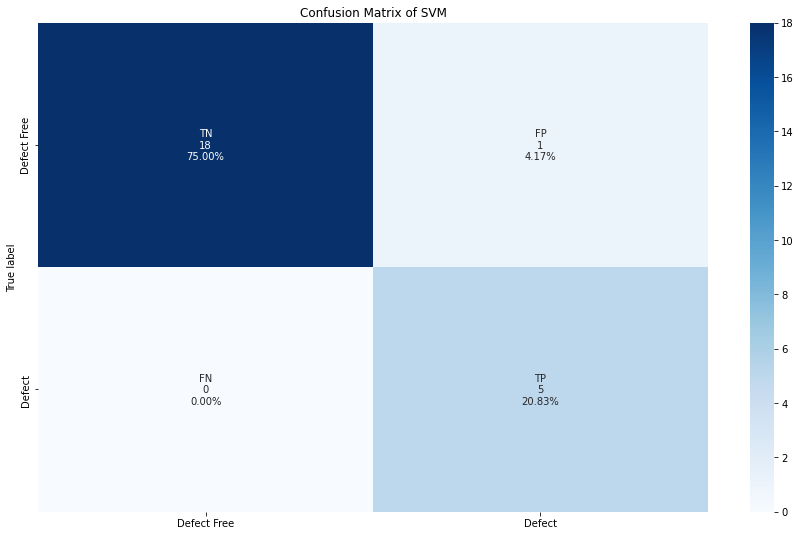

In [ ]:
make_confusion_matrix(matrixSVM, 
                      group_names=group_names,
                      categories=categories, 
                      cmap='Blues',
                      figsize=(15,9))
plt.title('Confusion Matrix of SVM')
plt.savefig("SVM_CM.pdf")
plt.show()

In [ ]:
# y_score1 = clsF.predict_proba(X[:,3:7])[:,1]
# y_score2 = clfOCSVM.predict_proba(X[:,3:7])[:,1]
# false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y, y_score1)
# false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y, y_score2)

In [ ]:
# print('roc_auc_score for DecisionTree: ', roc_auc_score(y, y_score1))
# print('roc_auc_score for Logistic Regression: ', roc_auc_score(y, y_score2))

In [ ]:
## How we can plot a ROC Curve in Python
def Snippet_140_Ex_2():
    
    y_score1 = clsF.predict_proba(X[:,3:7])[:,1]
    y_score2 = clfOCSVM.predict_proba(X[:,3:7])[:,1]
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y, y_score1)
    false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y, y_score2)

    print('roc_auc_score for Logistic Regression: ', roc_auc_score(y, y_score1))
    print('roc_auc_score for SVM: ', roc_auc_score(y, y_score2))

    # Ploting ROC curves
    plt.subplots(1, figsize=(15,19))
    plt.title('Receiver Operating Characteristic - LogReg')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    plt.subplots(1, figsize=(15,19))
    plt.title('Receiver Operating Characteristic - SVM')
    plt.plot(false_positive_rate2, true_positive_rate2)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Snippet_140_Ex_2()

NameError: ignored